In [ ]:
'''
主要方程：  1. identify_missing(self, missing_threshold)
                    inputs: self, the percentage of missing data wanted
                    finds features with certain missing percentage
                    adds the features to a to_drop list
                    prints the number count of features selected
                    
            2. identify_single_unique(self)
                    input: self
                    finds features with a single unique value
                    adds the features to a to_drop list
                    prints the number count of features selected
                    
            3. identify_collinear(self, correlation_threshold, one_hot=False)
                    inputs: self, the percentage of correlation wanted, include the one-hot encoding feature or not
                    finds features with high collinearity, select one from each pair of such features
                    adds selected features to a to_drop list
                    prints the number count of features selected
                    
            4. identify_zero_importance(self, task, eval_metric=None, 
                                             n_iterations=10, early_stopping = True)
                    inputs: self, 'classification' or 'regression', evaluation for early stopping, number of iterations, early stopping option
                    finds features with zero effect on the prediction result
                    adds the features to a to_drop list
                    prints the number count
                    
            5. identify_low_importance(self, cumulative_importance)
                    inputs: self, the percentage of cumulative importance of features wanted
                    finds features with little effect on the cumulative importance
                    adds features to a to_drop list
                    prints the number count
                    
            6. identify_all(self, selection_param)
                    inputs: self, the selection functions wanted
                    runs multiple selection functions at once
                    adds selected features to a to_drop list
                    prints a total number count
                    
            7. check_removal(self, keep_one_hot=True)
                    inputs: self, keep one hot encoding feature or not
                    checks identified features
                    returns the list of features identified
                    
                    
            8. remove(self, methods, keep_one_hot = True)
                    inputs: self, jeeo one hot encoding features or not
                    removes identified features
                    returns the data after removing identified features
                    

画图方程：  1. plot_missing(self)
            2. plot_unique(self)
            3. plot_collinear(self, plot_all = False)
            4. plot_feature_importances(self, plot_n = 15, threshold = None)
            5. reset_plot(self)  resets the plot to default condition
                    
'''

In [3]:
#import the feature selector package
from feature_selector import FeatureSelector
import pandas as pd

In [96]:
#把数据分成特征和标签
appl_train = pd.read_csv('application_train.csv')
train = pd.DataFrame(appl_train)
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
train_labels = train['CODE_GENDER']
type(train_labels)

pandas.core.series.Series

In [111]:
fs = FeatureSelector(data = train, labels = train_labels)
type(fs)

feature_selector.FeatureSelector

In [112]:
fs.identify_missing(missing_threshold = 0.6)

17 features with greater than 0.60 missing values.



In [113]:
fs.missing_stats.head()

,missing_fraction
COMMONAREA_MEDI,0.698723
COMMONAREA_AVG,0.698723
COMMONAREA_MODE,0.698723
NONLIVINGAPARTMENTS_MODE,0.694330
NONLIVINGAPARTMENTS_AVG,0.694330


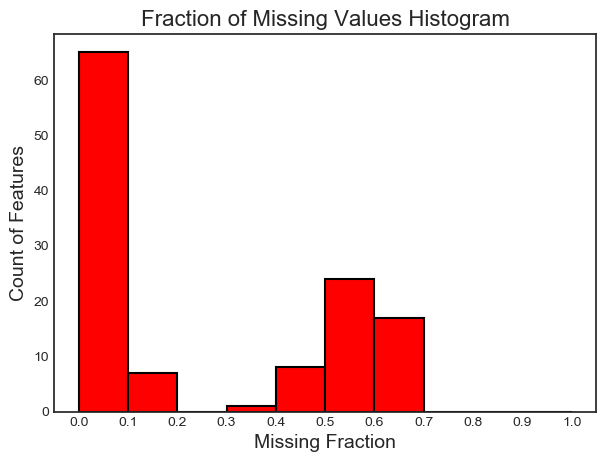

In [114]:
fs.plot_missing()

In [115]:
fs.identify_single_unique()

0 features with a single unique value.



In [116]:
fs.identify_zero_importance(task = 'classification', 
 eval_metric = 'auc', 
 n_iterations = 1, 
 early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0

233 features with zero importance after one-hot encoding.



In [117]:
zero_importance_features = fs.ops['zero_importance']

In [118]:
fs.identify_collinear(correlation_threshold = 0.98)

20 features with a correlation magnitude greater than 0.98.



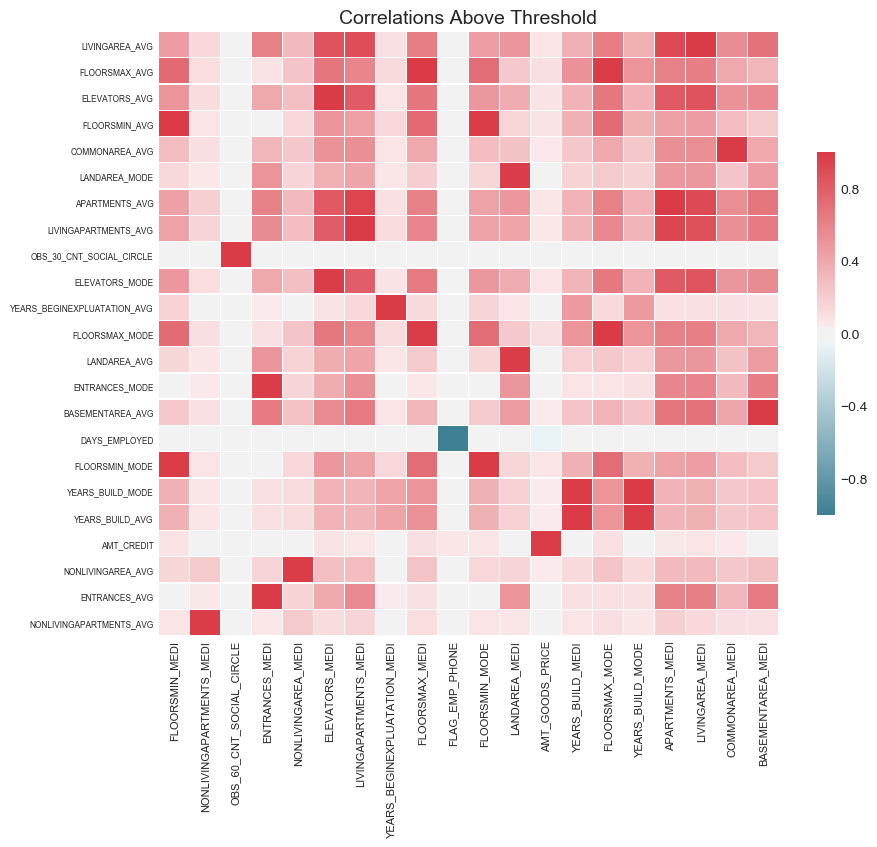

In [119]:
fs.plot_collinear()

In [120]:
fs.identify_low_importance(cumulative_importance = 0.99)

12 features required for cumulative importance of 0.99 after one hot encoding.
234 features do not contribute to cumulative importance of 0.99.

